<a href="https://colab.research.google.com/github/divsahib/finetuning_alignment/blob/main/Class_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/melissa-ong/ToyotaCorolla-Project/refs/heads/master/ToyotaCorolla.csv'
df = pd.read_csv(url)

In [5]:
data = df

In [41]:
import ipywidgets as widgets
from IPython.display import display

# Standardize column names
data.columns = data.columns.str.lower()

# Define predictors (X) and target variable (y)
X = data.drop('price', axis=1)
y = data['price']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Create interactive widgets
age = widgets.IntSlider(value=36, min=0, max=100, step=1, description='Age:')
km = widgets.IntSlider(value=50000, min=0, max=300000, step=1000, description='KM:')
hp = widgets.IntSlider(value=110, min=50, max=200, step=1, description='HP:')
cc = widgets.IntSlider(value=1600, min=1000, max=3000, step=100, description='CC:')
doors = widgets.IntSlider(value=4, min=2, max=5, step=1, description='Doors:')
weight = widgets.IntSlider(value=1150, min=800, max=2000, step=50, description='Weight:')

# Function to predict price
def predict_price(age, km, hp, cc, doors, weight):
    new_data = pd.DataFrame({
        'age': [age],
        'km': [km],
        'hp': [hp],
        'cc': [cc],
        'doors': [doors],
        'weight': [weight]
    })
    predicted_price = model.predict(new_data)
    print(f"Predicted Price: €{predicted_price[0]:.2f}")

# Create interactive app
interactive_app = widgets.interactive(predict_price, age=age, km=km, hp=hp, cc=cc, doors=doors, weight=weight)
display(interactive_app)


interactive(children=(IntSlider(value=36, description='Age:'), IntSlider(value=50000, description='KM:', max=3…

In [42]:
import random

def guessing_game():
    # Example car features
    car_features = {
        'Age': random.randint(0, 20),
        'KM': random.randint(10000, 200000),
        'HP': random.randint(50, 200),
        'CC': random.randint(1000, 3000),
        'Doors': random.choice([2, 3, 4]),
        'Weight': random.randint(800, 2000)
    }

    # Simulated price (for demonstration purposes)
    simulated_price = random.randint(5000, 30000)

    # Display car features
    print("Car Features:")
    for feature in car_features:
        print(f"{feature}: {car_features[feature]}")

    # Ask students to guess the price
    guessed_price = int(input("Guess the price of the car: €"))

    # Reveal actual price
    print(f"Actual Price: €{simulated_price}")
    print(f"Your Guess: €{guessed_price}")
    print(f"Difference: €{abs(simulated_price - guessed_price)}")


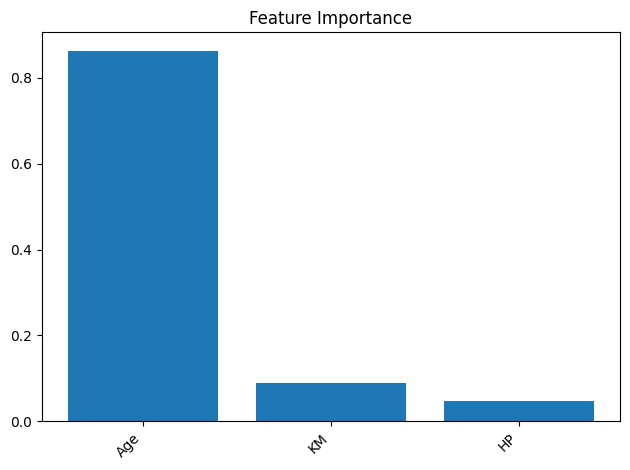

In [44]:
!pip install matplotlib numpy pandas scikit-learn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# ... (Your previous code to load data, create X_train_selected, y_train, etc.) ...

# Fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train_selected.values[:, :-1], y_train)

# Get feature names used in training
feature_names = X_train_selected.columns[:-1]  # Assuming 'columns' was meant to be feature names

# Plot feature importance
importances = rf_model.feature_importances_
plt.bar(feature_names, importances)  # Use feature_names instead of columns[:-1]
plt.title("Feature Importance")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [10]:
data.columns

Index(['Id', 'Model', 'Price', 'Age', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

Mutliple Linear Regression

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

1. Fitting a Relationship

To predict the price of used Toyota Corolla cars, we'll fit a multiple linear regression model. The relationship can be expressed as:

Price
=
β
0
+
β
1
⋅
Age
+
β
2
⋅
KM
+
β
3
⋅
HP
+
β
4
⋅
CC
+
β
5
⋅
Doors
+
β
6
⋅
Weight
+
ϵ

Where:
$\beta_0$ is the intercept
$\beta_1, \beta_2, \ldots, \beta_6$ are the coefficients for the predictors
$\epsilon$ is the error term

In [11]:
# Select relevant columns
columns = ['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Weight']
data = data[columns]

# Display the first few rows
print(data.head())

   Price  Age     KM  HP    cc  Doors  Weight
0  13500   23  46986  90  2000      3    1165
1  13750   23  72937  90  2000      3    1165
2  13950   24  41711  90  2000      3    1165
3  14950   26  48000  90  2000      3    1165
4  13750   30  38500  90  2000      3    1170


Now, let's prepare the data and fit the model:

In [14]:
# Define predictors (X) and target variable (y)
X = data.drop('Price', axis=1)
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

2. Explanatory vs. Predictive Modeling

Explanatory modeling focuses on understanding the relationship between predictors and the target variable. We can examine the coefficients to interpret the impact of each feature on the price.

Coefficients:
  Feature  Coefficient
0     Age  -119.956310
1      KM    -0.020114
2      HP    29.272278
3      cc    -0.102012
4   Doors   -22.339878
5  Weight    20.206584
Intercept: -5557.27


<Figure size 1000x600 with 0 Axes>

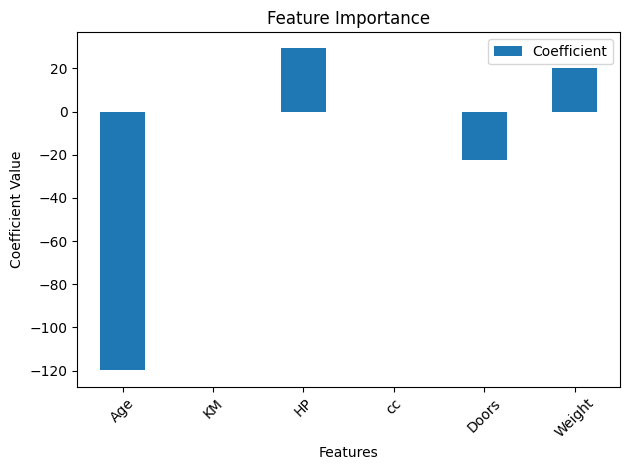

In [15]:
# Display coefficients for explanatory purposes
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("Coefficients:")
print(coefficients)
print(f"Intercept: {model.intercept_:.2f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
coefficients.plot(x='Feature', y='Coefficient', kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Predictive Modeling**

Predictive modeling aims to make accurate predictions on new, unseen data. We'll use the model to predict prices for the test set and evaluate its performance.

Mean Squared Error: 1993231.29
R-squared Score: 0.85


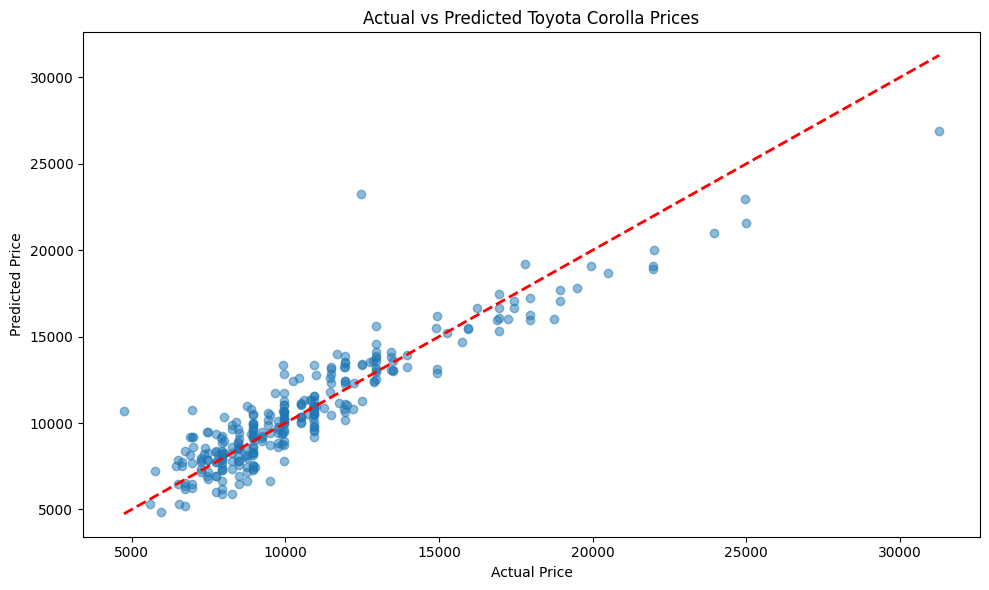

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's predictive performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Toyota Corolla Prices')
plt.tight_layout()
plt.show()


3. Estimating the Regression Equation and Prediction

The estimated regression equation can be constructed using the intercept and coefficients:

In [19]:
equation = f"Price = {model.intercept_:.2f}"
for feature, coef in zip(X.columns, model.coef_):
    equation += f" + {coef:.2f} * {feature}"

print("Estimated Regression Equation:")
print(equation)


Estimated Regression Equation:
Price = -5557.27 + -119.96 * Age + -0.02 * KM + 29.27 * HP + -0.10 * cc + -22.34 * Doors + 20.21 * Weight


To make predictions for new data:

In [21]:
# Example: Predict price for a new Toyota Corolla
new_car = pd.DataFrame({
    'Age': [36],  # 3 years old
    'KM': [50000],
    'HP': [110],
    'cc': [1600],
    'Doors': [4],
    'Weight': [1150]
})

predicted_price = model.predict(new_car)
print(f"Predicted price for the new car: €{predicted_price[0]:.2f}")


Predicted price for the new car: €15323.56


4. Assumption

Linear regression relies on several key assumptions. Let's examine these assumptions for our Toyota Corolla price prediction model.

4.1 Normality of Residuals
The noise ε (or equivalently, Y) should follow a normal distribution[a]. We can check this using a Q-Q plot and a histogram of residuals.

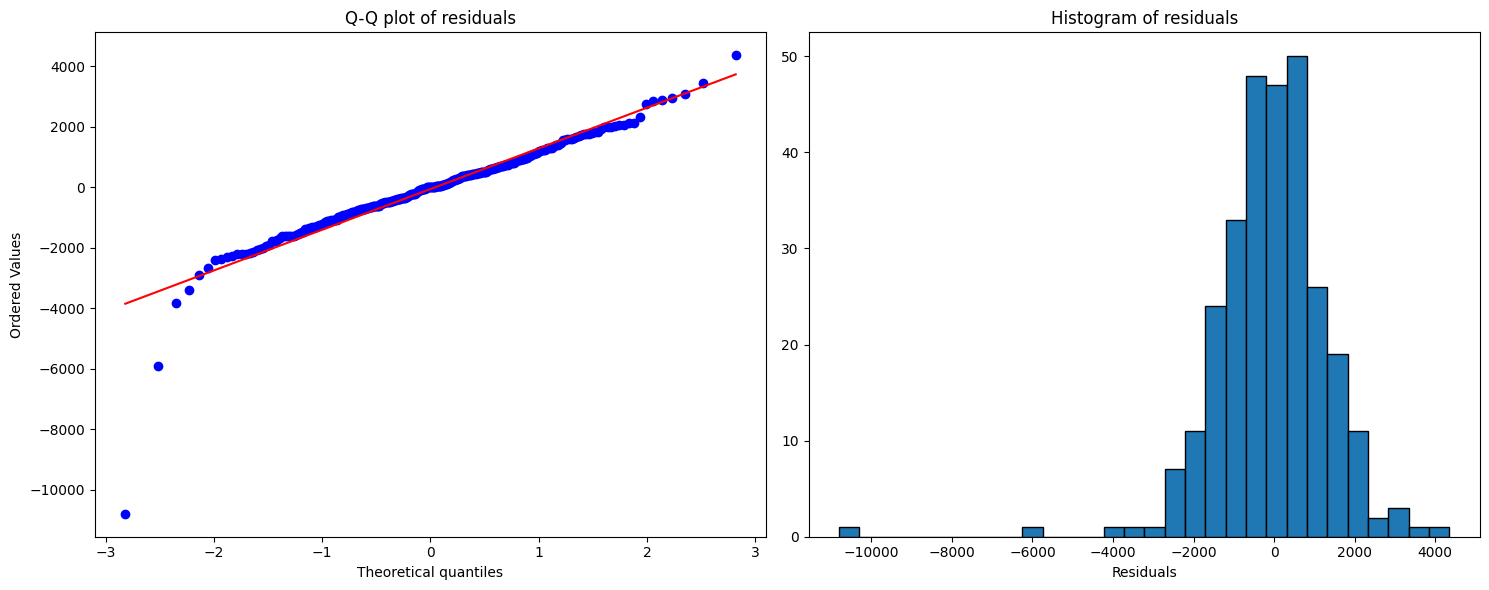

In [22]:
import scipy.stats as stats

# Calculate residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Create Q-Q plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
stats.probplot(residuals, plot=ax1, fit=True)
ax1.set_title("Q-Q plot of residuals")

# Create histogram of residuals
ax2.hist(residuals, bins=30, edgecolor='black')
ax2.set_title("Histogram of residuals")
ax2.set_xlabel("Residuals")
plt.tight_layout()
plt.show()


Interpret these plots:
If the residuals are normally distributed, the points in the Q-Q plot should roughly follow the diagonal line.
The histogram of residuals should approximate a normal distribution.

4.2 Linearity
The relationship between the predictors and the target variable should be linear[b]. We can check this using partial regression plots.

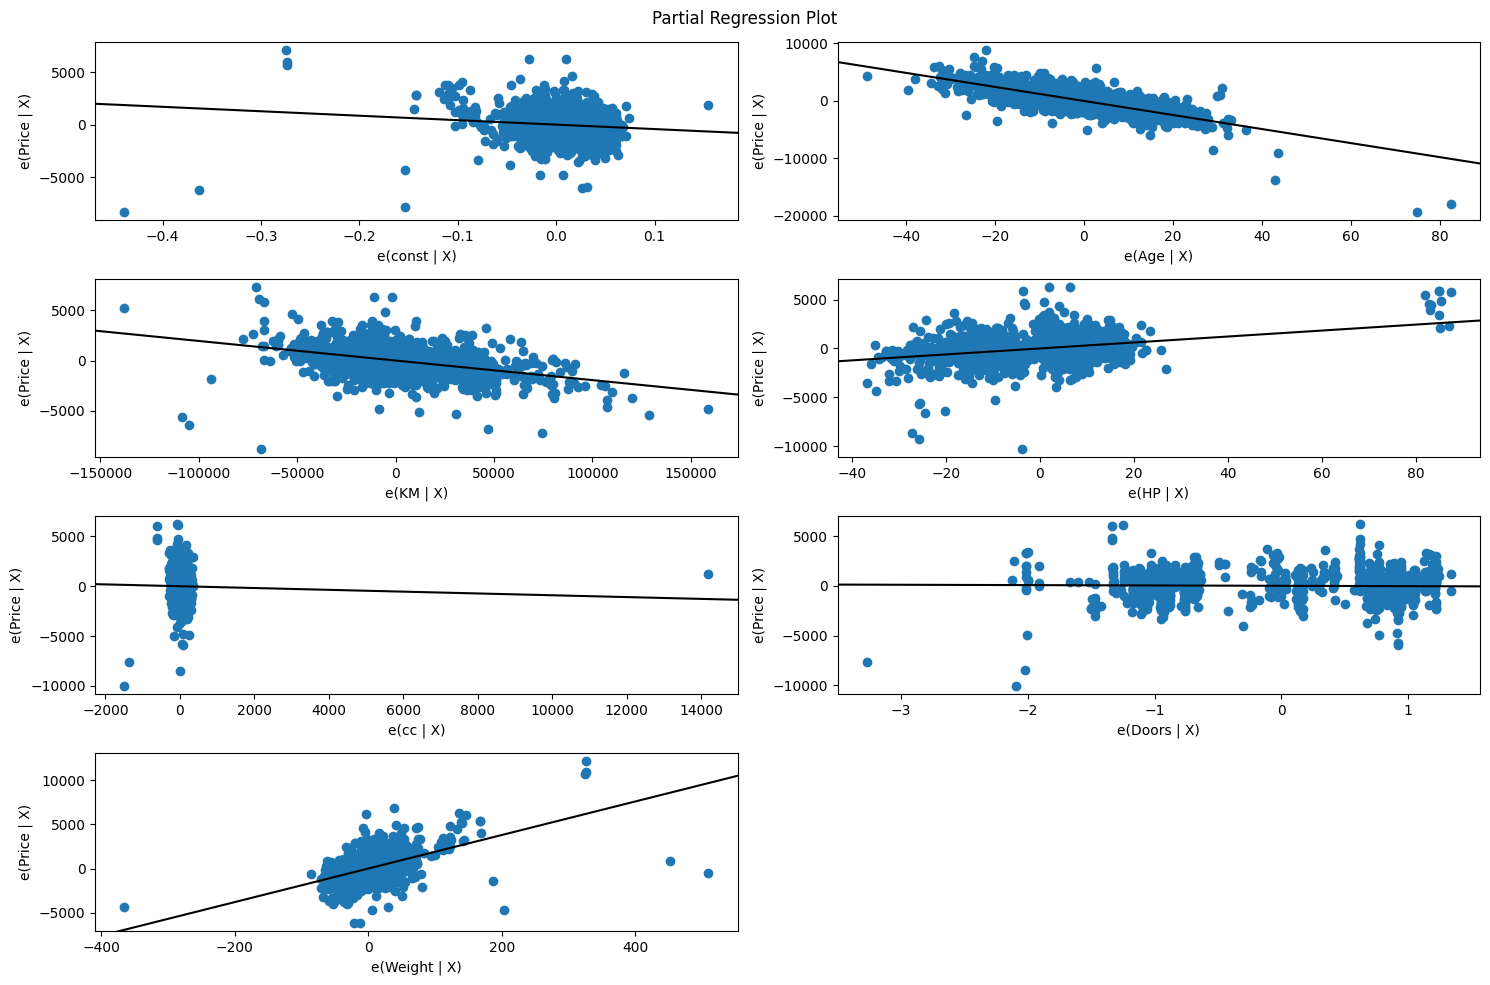

In [23]:
from statsmodels.graphics.regressionplots import plot_partregress_grid
import statsmodels.api as sm

# Add a constant term to the predictors (required for statsmodels)
X_with_const = sm.add_constant(X)

# Fit the model
model_sm = sm.OLS(y, X_with_const).fit()

# Create partial regression plots
fig = plt.figure(figsize=(15, 10))
plot_partregress_grid(model_sm, fig=fig)
plt.tight_layout()
plt.show()


4.3 Independence
The records should be independent of each other[c]. This assumption is typically ensured by the data collection process and cannot be easily tested statistically. It's important to consider the context of how the data was collected and whether there might be any dependencies between observations.

4.4 Homoscedasticity
The variability in the outcome values for a given set of predictors should be the same regardless of the values of the predictors[d][e]. We can check this using a residual plot.

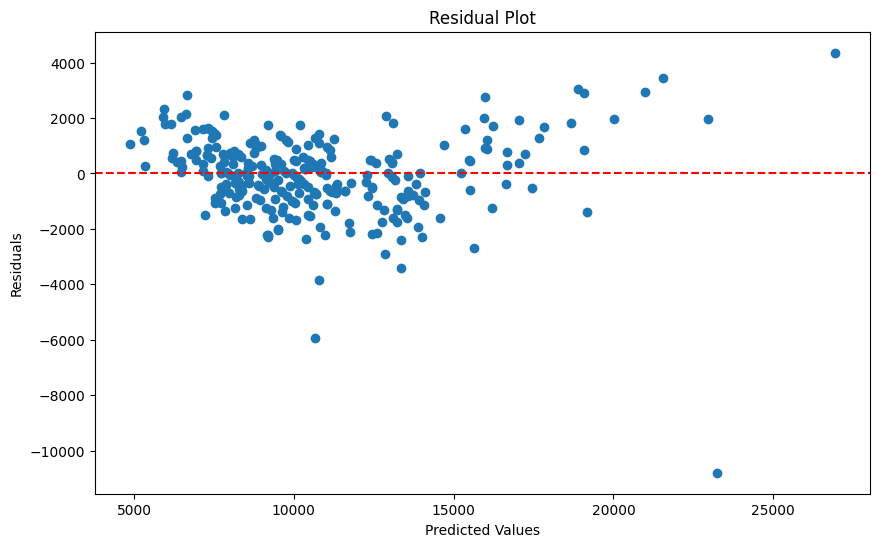

In [24]:
# Create residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


Interpret this plot: If the variance is constant, the spread of residuals should be roughly the same across all levels of predicted values.

5. Variable Selection

Variable selection is crucial for building an efficient and interpretable model. Here are some key considerations:
5.1 Importance of Variable Selection
Data Collection: It may be expensive or not feasible to collect a full complement of predictors for future predictions[a][b].
Measurement Accuracy: We may be able to measure fewer predictors more accurately (e.g., in surveys)[c][d].
Missing Values: The more predictors, the higher the chance of missing values in the data. If we delete or impute records with missing values, multiple predictors will lead to a higher rate of record deletion or imputation[e][f][g].
Parsimony: Models with fewer parameters provide more insight into the influence of predictors[h][i].
Multicollinearity: Regression coefficients are likely to be unstable due to multicollinearity in models with many variables. Regression coefficients are more stable for parsimonious models[j][k][l][m][n].
Sample Size: A rough rule of thumb is to have a number of records n larger than 5(p + 2), where p is the number of predictors[o].
Prediction Variance: Using predictors that are uncorrelated with the outcome variable increases the variance of predictions[p][q].
Prediction Bias: Dropping predictors that are actually correlated with the outcome variable can increase the average error (bias) of predictions[r][s].

Let's explore some variable selection techniques:
5.2.1 Correlation Analysis
First, let's examine the correlation between our predictors and the target variable.

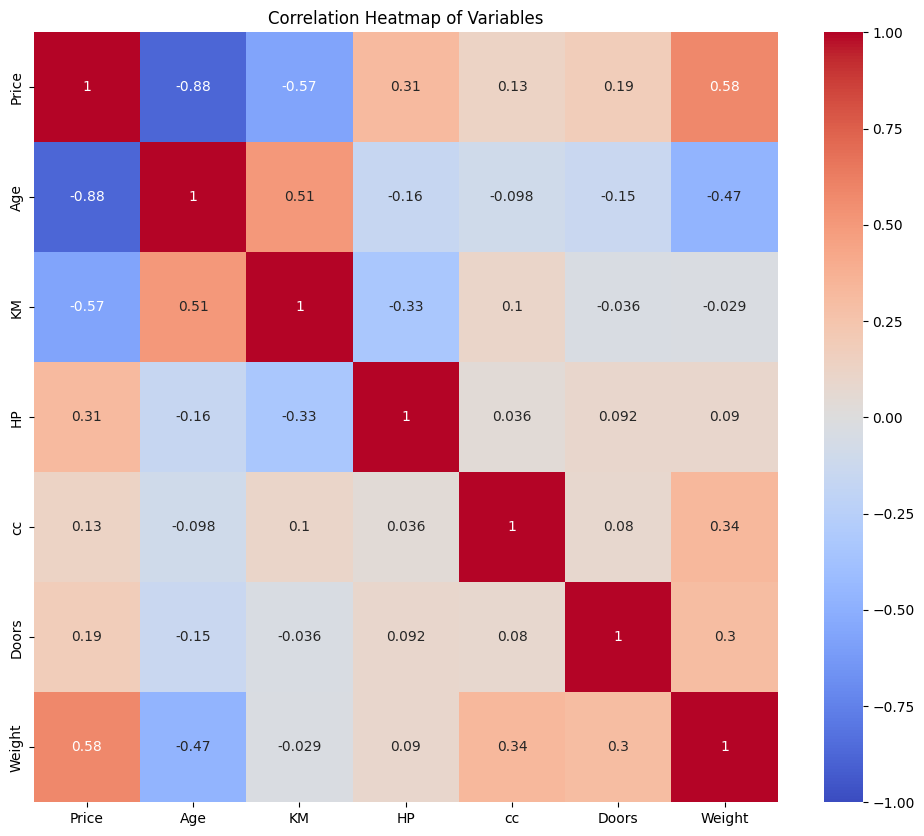

Correlations with Price:
Price     1.000000
Weight    0.581198
HP        0.314990
Doors     0.185326
cc        0.126389
KM       -0.569960
Age      -0.876590
Name: Price, dtype: float64


In [26]:
import seaborn as sns
# Compute correlation matrix
corr_matrix = data.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Variables')
plt.show()

# Print correlations with the target variable
print("Correlations with Price:")
print(corr_matrix['Price'].sort_values(ascending=False))

5.2.2 Backward Elimination
Let's perform backward elimination to select the most significant variables.

In [27]:
import statsmodels.formula.api as smf

def backward_elimination(data, target, significance_level=0.05):
    features = list(data.columns.drop(target))
    while len(features) > 0:
        formula = f"{target} ~ {' + '.join(features)}"
        model = smf.ols(formula=formula, data=data).fit()
        max_p_value = max(model.pvalues[1:])
        if max_p_value > significance_level:
            excluded_feature = model.pvalues[1:].idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

# Perform backward elimination
selected_features = backward_elimination(data, 'Price')
print("Selected features:", selected_features)

# Fit a new model with selected features
X_selected = data[selected_features]
y = data['Price']

X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

# Evaluate the new model
y_pred_selected = model_selected.predict(X_test_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f"R-squared of the model with selected features: {r2_selected:.4f}")


Selected features: ['Age', 'KM', 'HP', 'Weight']
R-squared of the model with selected features: 0.8506


5.2.3 Lasso Regression
Lasso regression performs both variable selection and regularization, which can help with multicollinearity.

Best alpha: 100.0000
Lasso selected features and coefficients:
  Feature  Coefficient
0     Age  -121.927880
2      HP    29.802587
5  Weight    18.819235
3      cc    -0.085707
1      KM    -0.019715


<Figure size 1000x600 with 0 Axes>

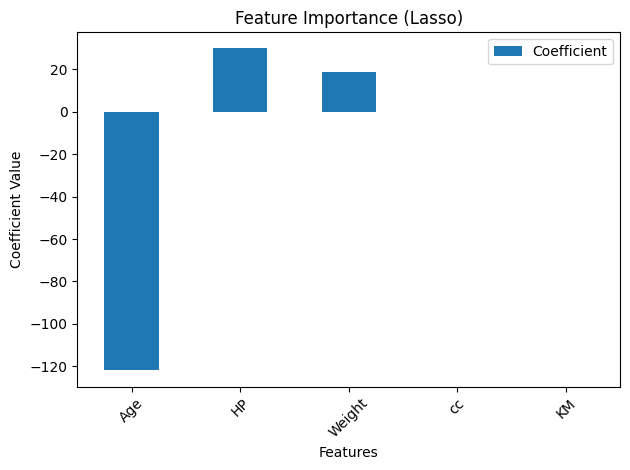

In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Perform Lasso regression with cross-validation
lasso = Lasso(random_state=42)
alphas = np.logspace(-4, 2, 100)

scores = []
for alpha in alphas:
    lasso.set_params(alpha=alpha)
    score = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')
    scores.append(np.mean(score))

# Find the best alpha
best_alpha = alphas[np.argmax(scores)]
print(f"Best alpha: {best_alpha:.4f}")

# Fit Lasso with the best alpha
lasso_best = Lasso(alpha=best_alpha, random_state=42)
lasso_best.fit(X, y)

# Display selected features and their coefficients
lasso_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_best.coef_})
lasso_coef = lasso_coef[lasso_coef.Coefficient != 0].sort_values('Coefficient', key=abs, ascending=False)
print("Lasso selected features and coefficients:")
print(lasso_coef)

# Plot feature importance
plt.figure(figsize=(10, 6))
lasso_coef.plot(x='Feature', y='Coefficient', kind='bar')
plt.title('Feature Importance (Lasso)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


6. Bias-Variance Trade Off

The bias-variance trade-off is a fundamental concept in machine learning that helps us understand the balance between model complexity and generalization performance.


6.1 Understanding Bias and Variance
Bias: The error introduced by approximating a real-world problem with a simplified model. High bias can lead to underfitting.
Variance: The error introduced by the model's sensitivity to small fluctuations in the training set. High variance can lead to overfitting.

6.2 Importance for Large Numbers of Predictors
The bias-variance trade-off is particularly important when dealing with a large number of predictors. In such cases:
Some variables may have small coefficients relative to the standard deviation of the noise.
These variables may also exhibit at least moderate correlation with other variables.
Dropping such variables can improve predictions by reducing prediction variance. This trade-off is a fundamental aspect of most data mining procedures for prediction and classification.
Let's visualize this trade-off using a learning curve:

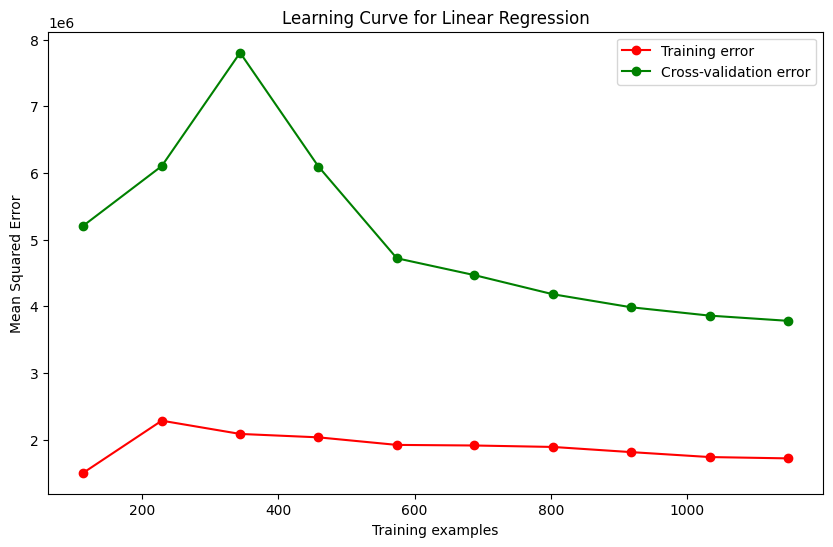

In [29]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), scoring="neg_mean_squared_error"
    )

    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation error")
    plt.legend(loc="best")
    plt.show()

# Plot learning curve for our linear regression model
plot_learning_curve(LinearRegression(), X, y, "Learning Curve for Linear Regression")


Interpret this plot:
If the training error is much lower than the cross-validation error, and the cross-validation error is high, we might have high variance (overfitting).
If both errors are high and close to each other, we might have high bias (underfitting).
The ideal scenario is when both errors converge to a low value.

7. Reducing the Number of Predictors

7. Reducing the Number of Predictors
Given the importance of the bias-variance trade-off, methods for reducing the number of predictors p to a smaller set are often used. Here are several approaches:
7.1 Domain Knowledge[a]
Leveraging expert knowledge to select relevant predictors:

In [31]:
# Example: Selecting predictors based on domain knowledge
domain_selected_features = ['Age', 'KM', 'HP', 'cc']  # Example selection
X_domain = data[domain_selected_features]

# Split the data and fit a model
X_train_domain, X_test_domain, y_train, y_test = train_test_split(X_domain, y, test_size=0.2, random_state=42)
model_domain = LinearRegression().fit(X_train_domain, y_train)

# Evaluate the model
y_pred_domain = model_domain.predict(X_test_domain)
r2_domain = r2_score(y_test, y_pred_domain)
print(f"R-squared of the model with domain-selected features: {r2_domain:.4f}")


R-squared of the model with domain-selected features: 0.8135


7.2 Exhaustive Search[b]
Trying all possible combinations of predictors (computationally expensive for large datasets):

In [32]:
from itertools import combinations
from sklearn.model_selection import cross_val_score

def exhaustive_search(X, y, max_features=3):
    best_score = -np.inf
    best_combo = None
    for i in range(1, max_features + 1):
        for combo in combinations(X.columns, i):
            score = cross_val_score(LinearRegression(), X[list(combo)], y, cv=5, scoring='r2').mean()
            if score > best_score:
                best_score = score
                best_combo = combo
    return best_combo, best_score

# Perform exhaustive search (limit to 3 features for demonstration)
best_combo, best_score = exhaustive_search(X, y, max_features=3)
print(f"Best combination: {best_combo}")
print(f"Best cross-validated R-squared: {best_score:.4f}")

Best combination: ('Age', 'KM', 'Weight')
Best cross-validated R-squared: 0.0461


7.3 Popular Subset Selection Algorithms[c]
7.3.1 Forward Selection[i]

In [33]:
from sklearn.feature_selection import SequentialFeatureSelector

# Perform forward selection
sfs_forward = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='forward')
X_forward = sfs_forward.fit_transform(X, y)

# Get selected feature names
selected_features_forward = X.columns[sfs_forward.get_support()].tolist()
print("Features selected by forward selection:", selected_features_forward)


Features selected by forward selection: ['Age', 'KM', 'HP', 'cc', 'Weight']


7.3.2 Backward Elimination[ii]
We've already implemented backward elimination earlier, but here's a reminder:

In [34]:
# Perform backward elimination (using the function defined earlier)
selected_features_backward = backward_elimination(data, 'Price')
print("Features selected by backward elimination:", selected_features_backward)


Features selected by backward elimination: ['Age', 'KM', 'HP', 'Weight']


7.3.3 Stepwise Regression[iii]
Stepwise regression combines forward selection and backward elimination:

In [35]:
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05):
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[included + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # Backward step
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        # Use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

# Perform stepwise selection
stepwise_features = stepwise_selection(X, y)
print("Features selected by stepwise regression:", stepwise_features)


Add  Age                            with p-value 0.0
Add  Weight                         with p-value 1.25153e-55
Add  KM                             with p-value 1.22158e-79
Add  HP                             with p-value 3.43359e-31
Features selected by stepwise regression: ['Age', 'Weight', 'KM', 'HP']


7.4 Regularization (Shrinkage)[d]
We've already implemented Lasso regression earlier, which performs both regularization and feature selection. Here's a reminder:

In [36]:
# Fit Lasso with the best alpha (using the model we fitted earlier)
lasso_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_best.coef_})
lasso_coef = lasso_coef[lasso_coef.Coefficient != 0].sort_values('Coefficient', key=abs, ascending=False)
print("Lasso selected features and coefficients:")
print(lasso_coef)


Lasso selected features and coefficients:
  Feature  Coefficient
0     Age  -121.927880
2      HP    29.802587
5  Weight    18.819235
3      cc    -0.085707
1      KM    -0.019715
